### **Importação das bibliotecas**

In [53]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

### Base de Dados

Para fins de estudo nesta tarefa, iremos utilizar a base de dados contento informações meterológica da cidade de Campo Grande/MS, durante o ano de 2023. A base de dados foi obtida a partir dos dados históricos anuais do Instituto Nacional de Meteorolgia (INMET), disponível em: https://portal.inmet.gov.br/uploads/dadoshistoricos/2023.zip

**Download do base**<br>
O código abaixo realiza o download da base de dados a partir do repositório github:

https://github.com/prof-LuizAlbano/unesp-mineracao-dados/blob/main/datasets/inmet/INMET_CO_MS_A702_CAMPO%20GRANDE_01-01-2023_A_31-12-2023.CSV

In [54]:
#Download da base de dados (Linux)
#!wget https://github.com/prof-LuizAlbano/unesp-mineracao-dados/blob/main/datasets/inmet/INMET_CO_MS_A702_CAMPO%20GRANDE_01-01-2023_A_31-12-2023.CSV

In [55]:
#Leitura do arquivo de dados
df = pd.read_csv('../datasets/inmet/INMET_CO_MS_A702_CAMPO-GRANDE_01-01-2023_A_31-12-2023.CSV', sep=';', low_memory=False, encoding='iso-8859-1', skiprows=8)

data = df.drop(['Data'],axis=1)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
df.head()

Number of instances = 8760
Number of attributes = 19


,Data,Hora UTC,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
0,2023/01/01,0000 UTC,0,951,951,"950,6",0,"24,3","21,1","25,9","24,3","21,6","20,9",83.0,75.0,83.0,191.0,"2,5",",6",NaN
1,2023/01/01,0100 UTC,0,"951,8","951,8",951,0,"24,9","21,4",25,"24,1","21,6","20,9",85.0,78.0,81.0,47.0,"2,5","1,5",NaN
2,2023/01/01,0200 UTC,0,"952,1","952,2","951,8",0,"23,6","20,1","25,2","23,6","21,2","19,9",81.0,74.0,81.0,302.0,"3,8",",5",NaN
3,2023/01/01,0300 UTC,0,"951,8","952,2","951,8",0,"23,6","20,4","23,9","23,5","20,4",20,83.0,79.0,82.0,42.0,"3,3","1,9",NaN
4,2023/01/01,0400 UTC,0,"951,2","951,8","951,2",0,"23,1","20,4","23,6","22,9","20,5","20,3",85.0,82.0,85.0,48.0,3,"1,5",NaN


### Dados ausentes

In [56]:
# Verificando dados em falta
print(df.isnull().sum())
print(len(df.columns))

Data                                                        0
Hora UTC                                                    0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                            3
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)       3
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)             3
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)            3
RADIACAO GLOBAL (Kj/m²)                                     3
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)                3
TEMPERATURA DO PONTO DE ORVALHO (°C)                        3
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                  3
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                  3
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)            3
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)            3
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                    3
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                    3
UMIDADE RELATIVA DO AR, HORARIA (%)                         3
VENTO, D

In [57]:
if 'Unnamed: 19' in df.columns:
    df = df.drop(columns=['Unnamed: 19'])
#contagem do numero total de colunas
print(df.isnull().sum())
print(len(df.columns))

Data                                                     0
Hora UTC                                                 0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         3
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    3
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          3
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         3
RADIACAO GLOBAL (Kj/m²)                                  3
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             3
TEMPERATURA DO PONTO DE ORVALHO (°C)                     3
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               3
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               3
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         3
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         3
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 3
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 3
UMIDADE RELATIVA DO AR, HORARIA (%)                      3
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                    

### Remoção dos dados Faltantes

In [58]:
df = df.dropna()
print(df.isnull().sum())
print(len(df.columns))

Data                                                     0
Hora UTC                                                 0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (Kj/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                    

In [59]:
#!pip install plotly dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [60]:
fig = px.scatter(
    df, 
    x="Hora UTC", 
    y="TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",  
    color="UMIDADE RELATIVA DO AR, HORARIA (%)",  
    title="Gráfico Interativo com Dash"
)
app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(figure=fig)  
])
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

In [65]:
def identificar_outliers_iqr(df):
    outliers = {}
    
    for coluna in df.select_dtypes(include=['float64', 'int']): 
        Q1 = df[coluna].quantile(0.25)  # Primeiro quartil
        Q3 = df[coluna].quantile(0.75)  # Terceiro quartil
        IQR = Q3 - Q1  # Intervalo interquartil (IQR)
        
        # Limites para detectar outliers
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        # Valores que estão fora dos limites definidos
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)][coluna]
        
    return outliers
print(identificar_outliers_iqr(df))
print(df.dtypes)

{'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': Series([], Name: UMIDADE REL. MAX. NA HORA ANT. (AUT) (%), dtype: float64), 'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)': Series([], Name: UMIDADE REL. MIN. NA HORA ANT. (AUT) (%), dtype: float64), 'UMIDADE RELATIVA DO AR, HORARIA (%)': Series([], Name: UMIDADE RELATIVA DO AR, HORARIA (%), dtype: float64), 'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': Series([], Name: VENTO, DIREÇÃO HORARIA (gr) (° (gr)), dtype: float64)}
Data                                                      object
Hora UTC                                                  object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                          object
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     object
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           object
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          object
RADIACAO GLOBAL (Kj/m²)                                   object
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              object
TEMPERATURA DO PO

In [67]:
def identificar_outliers_iqr(df):
    outliers = {}
    
    for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        
        print(f"Coluna: {coluna}")
        print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"Limite Inferior: {limite_inferior}, Limite Superior: {limite_superior}")
        
        outliers[coluna] = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
        
        if not outliers[coluna].empty:
            print(f"Outliers encontrados na coluna {coluna}:\n{outliers[coluna]}")
        else:
            print(f"Sem outliers na coluna {coluna}.")
    
    return outliers
print(outliers)

Series([], Name: VENTO, DIREÇÃO HORARIA (gr) (° (gr)), dtype: float64)


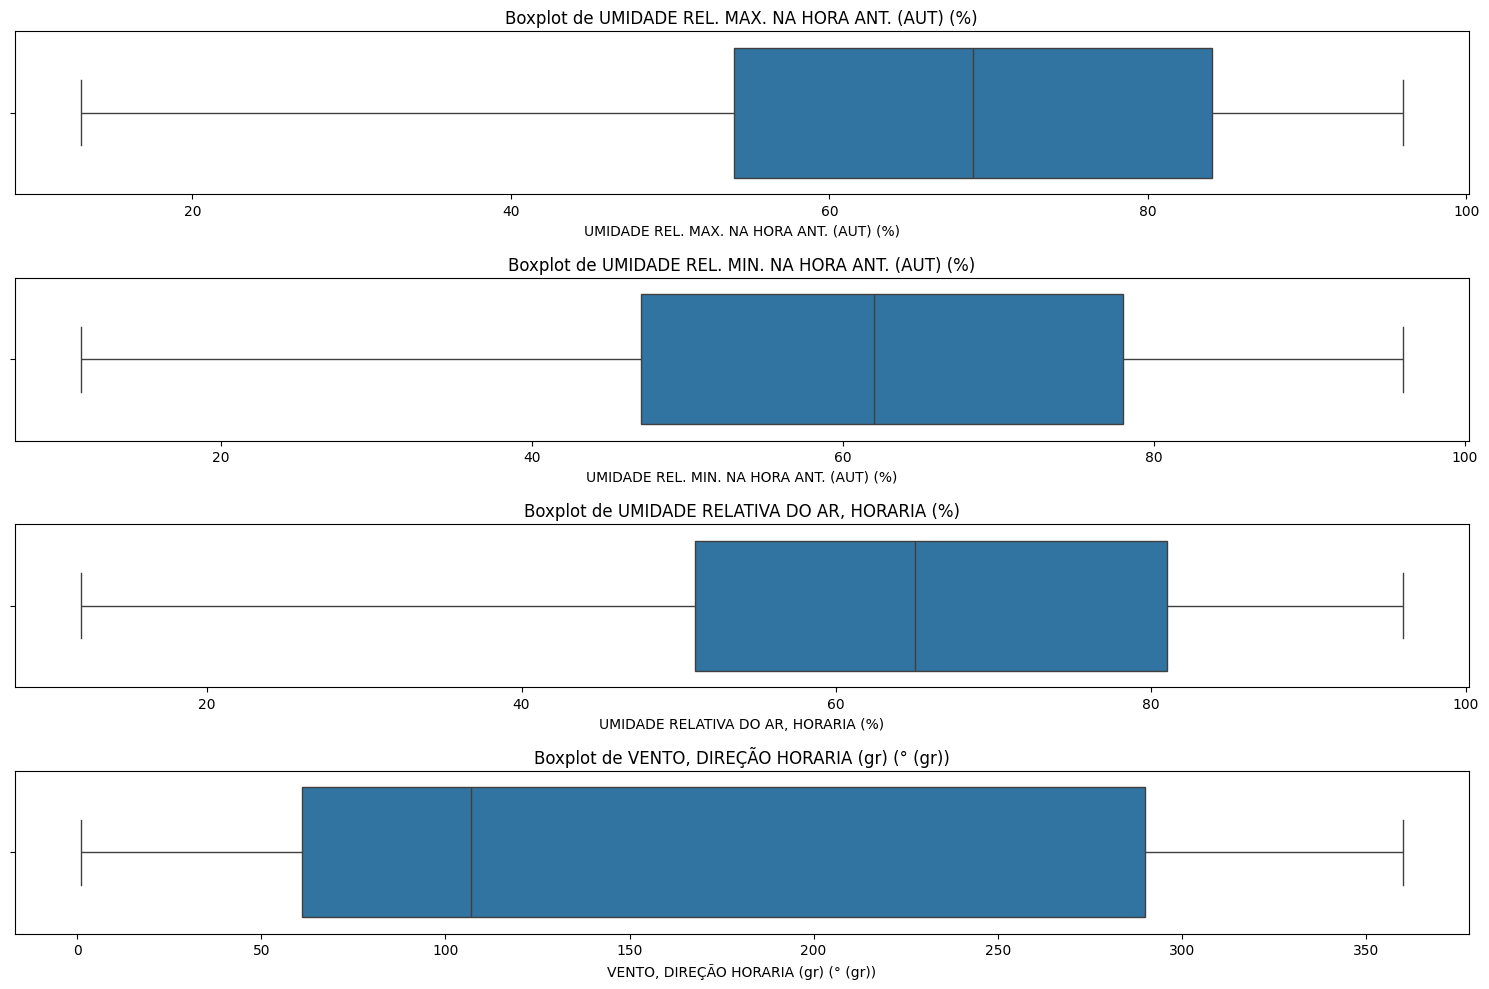

In [68]:
#!pip install seaborn
import seaborn as sns
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Definindo o tamanho da figura
plt.figure(figsize=(15, 10))

# Criando boxplots para cada coluna numérica
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(len(colunas_numericas), 1, i)
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.xlabel(coluna)

# Ajustando o layout da figura
plt.tight_layout()
plt.show()

In [69]:
duplicated_rows = df.duplicated()
num_duplicated_rows = duplicated_rows.sum()
print(f"Número de linhas duplicadas: {num_duplicated_rows}")
if num_duplicated_rows > 0:
    print("Linhas duplicadas:")
    print(df[duplicated_rows])
else:
    print("Não há linhas duplicadas.")

Número de linhas duplicadas: 0
Não há linhas duplicadas.


In [101]:
#agregação dos dados
if df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)
if df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)

temperatura = (df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'] + df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)']) / 2
print(temperatura)
if df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)
if df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)

   temperatura_orvalho = (df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] + df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)']) / 2
   print (temperatura_orvalho)

   umidade_relat = (df['UMIDADE RELATIVA MAX. NA HORA ANT. (AUT) (%)'] + df['UMIDADE RELATIVA MIN. NA HORA ANT. (AUT) (%)']) / 2   
   print(umidade_relat)

0       25.10
1       24.55
2       24.40
3       23.70
4       23.25
        ...  
8755    28.55
8756    25.25
8757    24.45
8758    24.75
8759    24.50
Length: 8749, dtype: float64


In [88]:
if df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)
if df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].dtype == 'object':
   df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'] = df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'].str.replace(',', '.').astype(float)

   temperatura_orvalho = (df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'] + df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)']) / 2
   print (temperatura_orvalho)

### To-Do (Roteiro do preprocessamento)

- Verificar dimensão da base (OK)
- Dados em branco / faltantes (OK)
    - Tratar dados faltantes (ok)
- Analisar Outliers
- Dados duplicados (ok)
- Agregação (em execução)
- Amostragem
- Discretização
- Análise dos dados